In [29]:
import praw
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

In [30]:
# SMU Applications 2022 Megathread
reddit = praw.Reddit(client_id='Uqa0qPvYrRATm6WB2yy6vw', client_secret='ExLLWnJZrEJ5XrSdU9GQ074YOoOg5A', user_agent='sentiment')

In [31]:
submission = reddit.submission(url="https://www.reddit.com/r/SGExams/comments/syg1xp/uni_smu_applications_2022_megathread/")

In [32]:
data = {
  "top_level_comment": [],
  "subcomments": []
}

submission.comments.replace_more(limit=None)

for top_level_comment in submission.comments:
    fullstring = top_level_comment.body
    
    if "cs" in fullstring.lower() or "cs" in fullstring.lower() or "scis" in fullstring.lower() or "IS" in fullstring:
        data["top_level_comment"].append(top_level_comment.body)
                
        top_level_replies = []
        top_level_replies.extend(top_level_comment.replies)
        subcomments_array = []
        
        while top_level_replies:
            second_level_reply = top_level_replies.pop(0)
            subcomments_array.append(second_level_reply.body)
        
        data['subcomments'].append(subcomments_array)
    else:
        pass

In [33]:
df = pd.DataFrame(data)

#print(df) 
df.head()

,top_level_comment,subcomments
0,Hi has anyone from JC applying for CS receive ...,"[Yup just got the email!, Yep I got the email ..."
1,hi. I got 81.25 rp. can I make it to cs and is...,[No harm trying! Demand changes every year.]
2,Hi anyone received economics discovery day or ...,"[Curious to know too…, Same here]"
3,anyone else smu cs discovery day?,"[hiii, Hii just got my cs dd email :)]"
4,hi anybody with 87.5 rp n above got discovery ...,[]


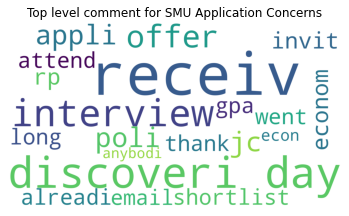

In [40]:
stop_words = stopwords.words('english')
stop_words.extend(['yet','cs', 'hello', 'may','etc', 'peep', 'peeps','smu','make', 'heard', 'mean', 'hi', 'ha', 'got', 'gotten','maybe','else', 'anybodi', 'anyone'])

qn_content = ''
for line in data['top_level_comment']:
    if len(line.strip()) > 0: # Eliminates empty answers
        qn_content += line.lower() + ' '    

    # Tokenize Words
    tokenizer = RegexpTokenizer(r'\w+')
    words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words

    # Remove stop words
    words_filtered = []
    for w in words_content:
        if w not in stop_words:
            words_filtered.append(w)

    # Porter Stemmer
    porter_stemmer = PorterStemmer()

    words_stemmed = []
    for w in words_filtered:
        words_stemmed.append(porter_stemmer.stem(w))

    #print(words_stemmed)

    # WordCloud
    words_joined = " ".join([w for w in words_stemmed])

    # Create a word cloud
    my_wordcloud = WordCloud(background_color='white',max_words=20,
                         width=1800,height=1000).generate(words_joined)

plt.imshow(my_wordcloud)
plt.title('Top level comment for SMU Application Concerns')
plt.axis('off')
plt.show()

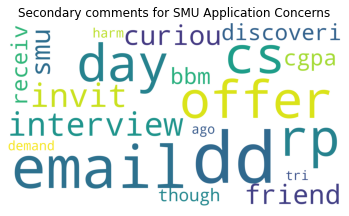

In [41]:
stop_words = stopwords.words('english')
stop_words.extend(['yet', 'yep', 'hi','hii','hiii', 'yup', 'make', 'heard', 'mean', 'hi', 'ha', 'got', 'gotten','maybe',
                   'else', 'anybodi'])

qn_content = ''
for line in data['subcomments']:
    for sentence in line:
        if len(sentence.strip()) > 0: # Eliminates empty answers
            qn_content += sentence.lower() + ' '    

    # Tokenize Words
    tokenizer = RegexpTokenizer(r'\w+')
    words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words

    # Remove stop words
    words_filtered = []
    for w in words_content:
        if w not in stop_words:
            words_filtered.append(w)

    # Porter Stemmer
    porter_stemmer = PorterStemmer()

    words_stemmed = []
    for w in words_filtered:
        words_stemmed.append(porter_stemmer.stem(w))

    # WordCloud
    words_joined = " ".join([w for w in words_stemmed])

    # Create a word cloud
    my_wordcloud = WordCloud(background_color='white', max_words=20,
                         width=1800, height=1000).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Secondary comments for SMU Application Concerns')
plt.show()